Test embedding

From documentation:


The input_type Parameter
With the release of the v3 embeddings models, there is a new mandatory parameter, input_type. It can be one of the following four values:

input_type="search_document": Use this when you have texts (documents) that you want to store in a vector database.
input_type="search_query": Use this when structuring search queries to find the most relevant documents in your vector database.
input_type="classification": Use this if you plan to use the embeddings as an input for a classification system.
input_type="clustering": Use this if you plan to use the embeddings for text clustering.
Using the right input type ensures the best possible results. If you want to use the embeddings for multiple use cases, we recommend using input_type="search_document".

In [10]:
import cohere
import os
import numpy as np



model="embed-multilingual-v3.0"

cohere_key = os.getenv('COHERE_API_KEY')  #Get your API key from www.cohere.com
cohere_key = "..."
co = cohere.Client(cohere_key)



passages = [
    "The European Commission has played a very helpful role through its structural funds, which cover up to 80% of the additional costs involved in integrating the Roma. ",
    "Die Europäische Kommission hat durch ihre Strukturfonds, die bis zu 80% der bei der Integration der Roma anfallenden zusätzlichen Kosten abdecken, eine hilfreiche Rolle gespielt. ",
    "The Surrender of Japan’s Peace Constitution",
    "日本和平宪法的投降",
]

# because the texts being embedded are the passages we are searching over, we set the input type as search_doc
doc_embeddings = co.embed(texts=passages,
                model=model,
                input_type="search_document",
                embedding_types=['ubinary'])

# compare them
def calculate_similarity(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def calculate_distance(a, b):
  return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Number of documents
num_docs = len(doc_embeddings.embeddings.ubinary)

# Iterate over each unique pair and calculate similarity
for i in range(num_docs):
    for j in range(i + 1, num_docs):
        distance = calculate_distance(doc_embeddings.embeddings.ubinary[i],
                                         doc_embeddings.embeddings.ubinary[j])
        print(f"Distance between Document {i + 1} and Document {j + 1}: {distance:.4f}")

Distance between Document 1 and Document 2: 0.0606
Distance between Document 1 and Document 3: 0.1910
Distance between Document 1 and Document 4: 0.1972
Distance between Document 2 and Document 3: 0.2012
Distance between Document 2 and Document 4: 0.2108
Distance between Document 3 and Document 4: 0.1038


In [11]:
import cohere
import os
import numpy as np



model="embed-multilingual-v3.0"

cohere_key = os.getenv('COHERE_API_KEY')  #Get your API key from www.cohere.com
cohere_key = "..."
co = cohere.Client(cohere_key)



passages = [
    "The European Commission has played a very helpful role through its structural funds, which cover up to 80% of the additional costs involved in integrating the Roma. ",
    "Die Europäische Kommission hat durch ihre Strukturfonds, die bis zu 80% der bei der Integration der Roma anfallenden zusätzlichen Kosten abdecken, eine hilfreiche Rolle gespielt. ",
    "The Surrender of Japan’s Peace Constitution",
    "日本和平宪法的投降",
]

# because the texts being embedded are the passages we are searching over, we set the input type as search_doc
doc_embeddings = co.embed(texts=passages,
                model=model,
                input_type="search_document",
                embedding_types=['float'])

# compare them
def calculate_similarity(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def calculate_distance(a, b):
  return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Number of documents
num_docs = len(doc_embeddings.embeddings.float)

# Iterate over each unique pair and calculate similarity
for i in range(num_docs):
    for j in range(i + 1, num_docs):
        distance = calculate_distance(doc_embeddings.embeddings.float[i],
                                         doc_embeddings.embeddings.float[j])
        print(f"Distance between Document {i + 1} and Document {j + 1}: {distance:.4f}")

Distance between Document 1 and Document 2: 0.1158
Distance between Document 1 and Document 3: 0.6901
Distance between Document 1 and Document 4: 0.7159
Distance between Document 2 and Document 3: 0.6867
Distance between Document 2 and Document 4: 0.6768
Distance between Document 3 and Document 4: 0.1911


# 8 pairs of sentence for test

Sentences:
Sentence pair 1:
English: In 2014, Mexico imported $136 billion of intermediate goods from the US, and the US imported $132 billion of intermediate goods from Mexico. More than two-thirds of US imports from Mexico were inputs used in further processing – cost-efficient inputs that boost US production and employment, and enhance the competitiveness of US companies in global markets.
Chinese: 2014年，墨西哥从美国进口了价值1360亿美元的中间产品，而美国则反过来进口了价值1330亿美元的类似产品。 美国的墨西哥进口货物中有超过2/3是用于进一步加工的生产资料，这些极具性价比的物资有助于提高美国生产和就业，并提升美国企业在全球市场上的竞争力。 在墨西哥，美国或其他地方最终上架销售之前，货物经常在美墨边界往返多次。

Sentence pair 2:
English: Mutually assured destruction was explicitly acknowledged during the Cold War in statements from both sides. In the race for resources that defines the twenty-first century, no actor is directly or indirectly threatening other players to curtail food or energy exports, but all bear the systemic risks.
Chinese: 与二十世纪的核武竞赛不同，资源安全日程不是线性的。 确保互相摧毁白纸黑字地写在冷战期间对立双方的声明中。 在成为二十一世纪特征的资源竞赛中，没有哪个行动方直接或间接地威胁其他行动方减少

C:\Users\kinla\AppData\Local\Temp\ipykernel_16764\1185123457.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(range(1, num_of_gen * 2 + 1)))
C:\Users\kinla\AppData\Local\Temp\ipykernel_16764\1185123457.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(range(1, num_of_gen * 2 + 1)))


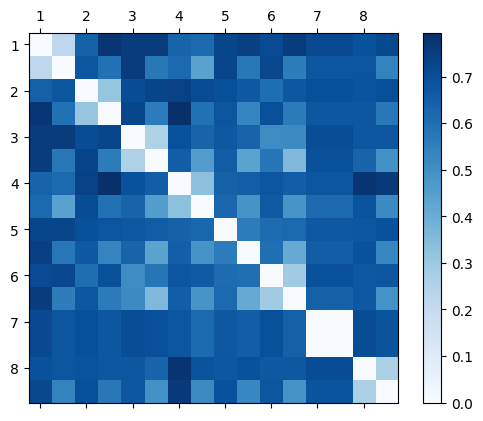

In [15]:
import itertools
import random
from pprint import pprint
import cohere
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the dataset files
english_dataset_path = r'./dataset/News-Commentary/News-Commentary.en-zh.en'
chinese_dataset_path = r'./dataset/News-Commentary/News-Commentary.en-zh.zh'

# Function to get random sentence pairs
def get_random_sentence_pairs(english_path, chinese_path, num_pairs=1):
    with open(english_path, 'r', encoding='utf-8') as eng_file, \
         open(chinese_path, 'r', encoding='utf-8') as zh_file:
        
        english_lines = eng_file.readlines()
        chinese_lines = zh_file.readlines()
        
        if len(english_lines) != len(chinese_lines):
            print("Error: The files don't have the same number of lines.")
            return None

        random_indices = random.sample(range(len(english_lines)), num_pairs)
        sentence_pairs = [
            (english_lines[index].strip(), chinese_lines[index].strip())
            for index in random_indices
        ]
        
        return sentence_pairs

# Generate 8 random sentence pairs
num_of_gen = 8
sentence_pairs = get_random_sentence_pairs(english_dataset_path, chinese_dataset_path, num_of_gen)

# Flatten the list of pairs for embedding
passages = list(itertools.chain(*sentence_pairs))

# Print out the sentences
print("Sentences:")
for i, (eng, zh) in enumerate(sentence_pairs, 1):
    print(f"Sentence pair {i}:")
    print(f"English: {eng}")
    print(f"Chinese: {zh}\n")

# Cohere API setup
model = "embed-multilingual-v3.0"
cohere_key = "..."  # Replace with your actual API key
co = cohere.Client(cohere_key)

# Embedding the passages
doc_embeddings = co.embed(texts=passages,
                          model=model,
                          input_type="search_document",
                          embedding_types=['float'])

# Function to calculate cosine distance
def calculate_distance(a, b):
    return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculate distances and fill an 8x8 matrix
distances = np.zeros((num_of_gen * 2, num_of_gen * 2))
for i in range(num_of_gen * 2):
    for j in range(num_of_gen * 2):
        distances[i][j] = calculate_distance(doc_embeddings.embeddings.float[i],
                                             doc_embeddings.embeddings.float[j])

# Visualize the matrix
fig, ax = plt.subplots()
cax = ax.matshow(distances, cmap=plt.cm.Blues)

# Add color bar for reference
fig.colorbar(cax)

# Set axis labels to sentence indices
ax.set_xticklabels([''] + list(range(1, num_of_gen * 2 + 1)))
ax.set_yticklabels([''] + list(range(1, num_of_gen * 2 + 1)))

# Display the matrix
plt.show()